In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("dataset.csv",delimiter=";")

In [4]:
data=data[["estado","e3","e0"]]

In [5]:
data

,estado,e3,e0
0,R,0,0
1,R,0,0
2,R,0,0
3,R,0,0
4,R,0,0
...,...,...,...
462,A,1,1
463,A,1,1
464,A,1,1
465,A,1,1


<Axes: xlabel='estado'>

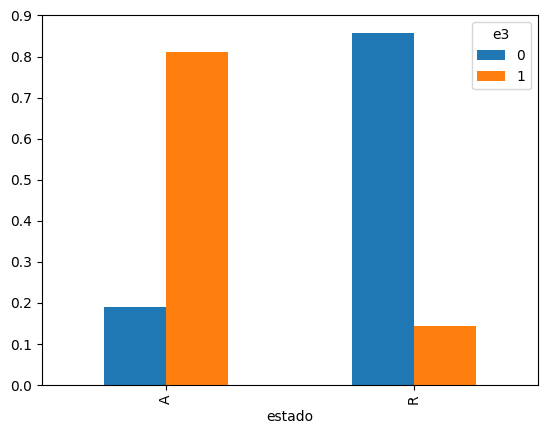

In [6]:
pd.crosstab(data["estado"],data["e3"],normalize="index").plot.bar()

<Axes: xlabel='estado'>

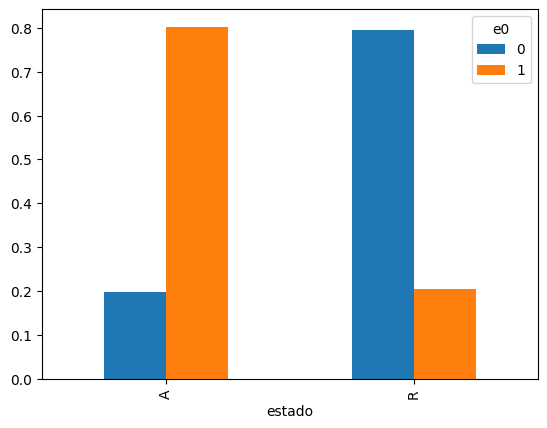

In [7]:
pd.crosstab(data["estado"],data["e0"],normalize="index").plot.bar()

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

In [9]:
Y=data["estado"].astype("category").cat.codes

In [10]:
Y.value_counts()

0    418
1     49
Name: count, dtype: int64

In [12]:
X=data[["e3","e0"]]

In [13]:
X

,e3,e0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
462,1,1
463,1,1
464,1,1
465,1,1


In [14]:
X=X.to_numpy()
Y=Y.to_numpy()

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)

In [16]:
from imblearn.over_sampling import RandomOverSampler

In [17]:
np.sum(y_train)

39

In [18]:
y_train.shape

(373,)

In [19]:
os=RandomOverSampler(random_state=1)
x_train_o,y_train_o=os.fit_resample(x_train,y_train)

In [20]:
x_train_o.shape

(668, 2)

In [21]:
y_train_o.shape

(668,)

In [22]:
np.sum(y_train_o)

334

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Input
from keras.models import Sequential

2024-07-03 22:01:41.170908: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
modelo=Sequential()
modelo.add(Input(shape=(2,)))
modelo.add(Dense(32))
modelo.add(Dense(1,activation="sigmoid"))
modelo.compile(loss="binary_crossentropy",metrics=["accuracy"])

In [25]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
modelo.fit(x_train_o,y_train_o,validation_data=(x_test,y_test),epochs=16)

Epoch 1/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4595 - loss: 0.6866 - val_accuracy: 0.7872 - val_loss: 0.5699
Epoch 2/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8224 - loss: 0.6295 - val_accuracy: 0.8617 - val_loss: 0.5096
Epoch 3/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8068 - loss: 0.5786 - val_accuracy: 0.8617 - val_loss: 0.4762
Epoch 4/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 0.5599 - val_accuracy: 0.8617 - val_loss: 0.4542
Epoch 5/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8063 - loss: 0.5265 - val_accuracy: 0.8617 - val_loss: 0.4395
Epoch 6/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 0.4980 - val_accuracy: 0.7872 - val_loss: 0.4466
Epoch 7/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8139 - loss: 0.4966 - val_accuracy: 0.7872 - val_loss: 0.4490
Epoch 8/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8012 - loss: 0.4964 - val_accuracy: 0.7872 - val_loss: